In [1]:
# The code was removed by Watson Studio for sharing.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [1]:
#import tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

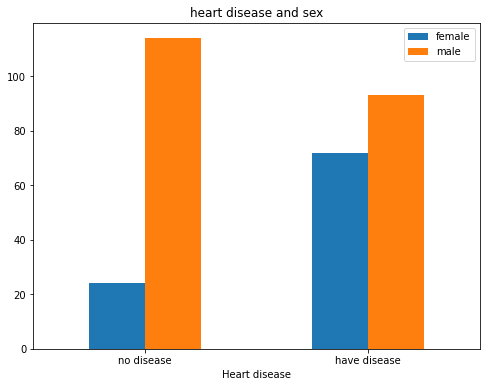

In [7]:
#compare sex with target
pd.crosstab(df.target,df.sex).plot(kind='bar', figsize=(8,6));
plt.title('heart disease and sex')
plt.xlabel('Heart disease')
plt.legend(['female','male'])
plt.xticks([0,1],['no disease','have disease'] , rotation=0);

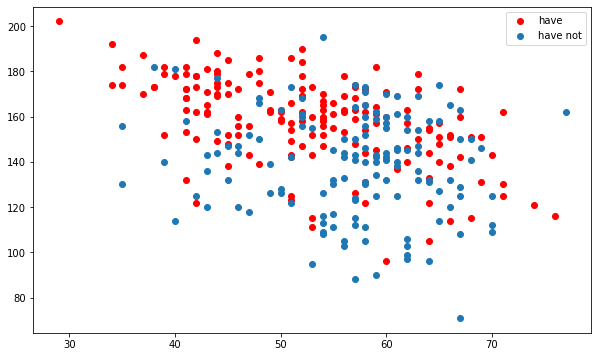

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0])
plt.legend(['have','have not'])

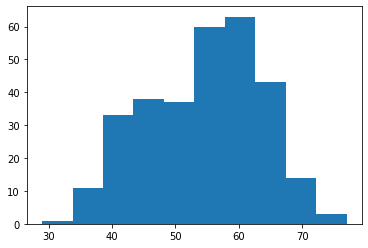

In [9]:
plt.hist(df.age);

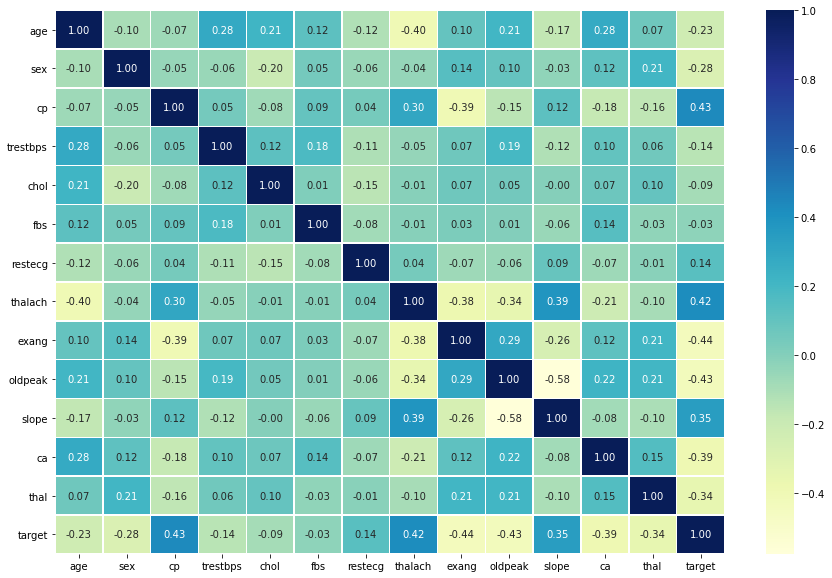

In [10]:
corr_matrix= df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True ,
                 fmt= '.2f',
                 linewidths=0.5,
                 cmap='YlGnBu')

In [11]:
#split X and y

X ,y = df.drop('target',axis=1) , df['target']

In [12]:
np.random.seed(42)
X_train,X_test,y_train,y_test =train_test_split(X ,
                                                y,
                                                test_size=0.2)

In [13]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [14]:
# put all model in dictionary

models={
    'Logestic Regression':LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier()
       }

## make function to fit and Score the models
def fit_score (model,X_train,y_train,X_test,y_test):
    np.random.seed(42)
    for model_name , model in model.items():
        model.fit(X_train,y_train)
        print(f'{model_name} score : {model.score(X_test,y_test):.2f}')
        
fit_score(models,X_train,y_train,X_test,y_test)

Logestic Regression score : 0.89
KNN score : 0.69
Random Forest score : 0.84


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
train_score = {}
test_score = {}
knn=KNeighborsClassifier()
neighbors = range(1,21)

for i in neighbors :
    knn.set_params(n_neighbors =i)
    knn.fit(X_train,y_train)
    train_score[i]=knn.score(X_train,y_train)
    test_score[i]=knn.score(X_test,y_test)


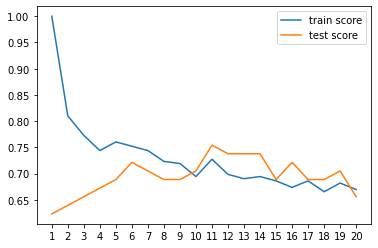

In [16]:
plt.plot(train_score.keys(),train_score.values() ,label='train score')
plt.plot(test_score.keys(),test_score.values() ,label='test score')
plt.xticks(np.arange(1,21,1))
plt.legend()


In [24]:
clf = LogisticRegression()
grid = {'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-4, 4, 30),
        'solver' : ['liblinear']}

rs_clf=GridSearchCV(estimator=clf ,
                          param_grid=grid,
                         
                          cv=5 ,
                          verbose=2)
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ........... C=0.0001, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.0012689610031679222, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, penalty=l2, solver=liblinear ...........
[CV]  C=0.0012689610031679222, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, penalty=l2, solver=liblinear ...........
[CV]  C=0.0012689610031679222, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, penalty=l2, solver=liblinear ...........
[CV]  C=0.0012689610031679222, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, penalty=l2, solver=liblinear ...........
[CV]  C=0.0012689610031679222, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.0012689610031679222, penalty=l2, solver=liblinear ...........
[CV]  C=0.0012689610031679222, penalty=l2, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, penalty=l1, solver=liblinear ............
[CV]  C=0.002395026619987486, penalty=l1, solver=liblinear, total=   0.0s
[CV] C=0.002395026619987486, penalty=l1, solver=li

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [25]:
rs_clf.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [26]:
rs_clf.score(X_test,y_test)

0.8852459016393442

In [20]:
y_preds=rs_clf.predict(X_test)

In [21]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [23]:
rf_grid = {'n_estimators' : np.arange(100,1000,200) ,
           'max_features' : ['auto', 'sqrt'] ,
           'max_depth' : [10,40,70,None],
           'min_samples_split' : [2,5,10] ,
           'min_samples_leaf': [1,2,4],
           'bootstrap' : [True , False]}

rf_clf=GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=rf_grid ,
                    cv=3,
                    verbose=2)

rf_clf.fit(X_train,y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   0.3s
[CV] bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  bootstrap=True, max_depth=10, 

KeyboardInterrupt: 